In [1]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [2]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [3]:
# Loading data
df_2015 = pd.read_sql("SELECT * FROM CocData WHERE year = 2015", con = conn)

df_2015.head()

,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,AK-500,1019,603,416,0,28,492,71,2015,AK-500 2015,1208,179,1029,297547.0,4.900000
1,AK-501,841,581,260,0,7,284,0,2015,AK-501 2015,748,138,610,421708.0,8.770833
2,AL-500,1054,406,614,34,585,1686,34,2015,AL-500 2015,1153,237,916,955960.0,5.066667
3,AL-501,484,359,125,0,75,208,0,2015,AL-501 2015,578,214,364,617401.0,6.250000
4,AL-502,264,70,194,0,0,58,0,2015,AL-502 2015,245,31,214,208510.0,7.125000


In [4]:
df_2015=df_2015.drop(['TotalHomeless', 'Sheltered', 'TotalBeds', 'CocYear', 'Coc', 'Year'], axis=1)

In [5]:
#df_2015['Unsheltered_div_pop'] = df_2015['Unsheltered'] / df_2015['Population']

In [6]:
#df_2015.head()

In [7]:
df_2015['Unsheltered_perc_pop'] = (df_2015['Unsheltered'] / df_2015['Population']) *100

In [8]:
df_2015.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop
0,603,416,0,28,492,71,179,297547.0,4.900000,0.060159
1,581,260,0,7,284,0,138,421708.0,8.770833,0.032724
2,406,614,34,585,1686,34,237,955960.0,5.066667,0.024792
3,359,125,0,75,208,0,214,617401.0,6.250000,0.034661
4,70,194,0,0,58,0,31,208510.0,7.125000,0.014867


In [9]:
df_2015['ES_beds_perc_pop'] = (df_2015['Emergency'] / df_2015['Population']) *100

In [10]:
df_2015['TS_beds_perc_pop'] = (df_2015['Transitional'] / df_2015['Population']) *100

In [11]:
df_2015['SH_beds_perc_pop'] = (df_2015['SafeHaven'] / df_2015['Population']) *100

In [12]:
df_2015['RRH_units_perc_pop'] = (df_2015['RapidRehousing'] / df_2015['Population']) *100

In [13]:
df_2015['RRH_units_perc_pop'] = (df_2015['RapidRehousing'] / df_2015['Population']) *100

In [14]:
df_2015['PSH_units_perc_pop'] = (df_2015['PermanentSupportive'] / df_2015['Population']) *100

In [15]:
df_2015['OPH_units_perc_pop'] = (df_2015['PermanentOther'] / df_2015['Population']) *100

In [16]:
df_2015.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,603,416,0,28,492,71,179,297547.0,4.900000,0.060159,0.202657,0.139810,0.000000,0.009410,0.165352,0.023862
1,581,260,0,7,284,0,138,421708.0,8.770833,0.032724,0.137773,0.061654,0.000000,0.001660,0.067345,0.000000
2,406,614,34,585,1686,34,237,955960.0,5.066667,0.024792,0.042470,0.064229,0.003557,0.061195,0.176367,0.003557
3,359,125,0,75,208,0,214,617401.0,6.250000,0.034661,0.058147,0.020246,0.000000,0.012148,0.033690,0.000000
4,70,194,0,0,58,0,31,208510.0,7.125000,0.014867,0.033572,0.093041,0.000000,0.000000,0.027816,0.000000


In [17]:
df_2015=df_2015.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered'], axis=1)

In [18]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            371 non-null    float64
 1   Unemployment          371 non-null    float64
 2   Unsheltered_perc_pop  371 non-null    float64
 3   ES_beds_perc_pop      371 non-null    float64
 4   TS_beds_perc_pop      371 non-null    float64
 5   SH_beds_perc_pop      371 non-null    float64
 6   RRH_units_perc_pop    371 non-null    float64
 7   PSH_units_perc_pop    371 non-null    float64
 8   OPH_units_perc_pop    371 non-null    float64
dtypes: float64(9)
memory usage: 26.2 KB


In [19]:
df_2015.head()

,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,297547.0,4.900000,0.060159,0.202657,0.139810,0.000000,0.009410,0.165352,0.023862
1,421708.0,8.770833,0.032724,0.137773,0.061654,0.000000,0.001660,0.067345,0.000000
2,955960.0,5.066667,0.024792,0.042470,0.064229,0.003557,0.061195,0.176367,0.003557
3,617401.0,6.250000,0.034661,0.058147,0.020246,0.000000,0.012148,0.033690,0.000000
4,208510.0,7.125000,0.014867,0.033572,0.093041,0.000000,0.000000,0.027816,0.000000


In [20]:
# Define the features set.
X = df_2015.copy()
X = X.drop("Unsheltered_perc_pop", axis=1)
X.head()

,Population,Unemployment,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,297547.0,4.900000,0.202657,0.139810,0.000000,0.009410,0.165352,0.023862
1,421708.0,8.770833,0.137773,0.061654,0.000000,0.001660,0.067345,0.000000
2,955960.0,5.066667,0.042470,0.064229,0.003557,0.061195,0.176367,0.003557
3,617401.0,6.250000,0.058147,0.020246,0.000000,0.012148,0.033690,0.000000
4,208510.0,7.125000,0.033572,0.093041,0.000000,0.000000,0.027816,0.000000


In [21]:
# Define the target set.
y = df_2015["Unsheltered_perc_pop"].ravel()
y[:5]

array([0.06015856, 0.03272406, 0.02479183, 0.03466143, 0.01486739])

In [22]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [24]:
reg_model = regr.fit(X, y)

In [25]:
importances = reg_model.feature_importances_
importances

array([0.10840468, 0.15188667, 0.04965135, 0.29258301, 0.00919271,
       0.06002568, 0.324067  , 0.00418892])

In [26]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.3240670003130131, 'PSH_units_perc_pop'),
 (0.2925830113402338, 'TS_beds_perc_pop'),
 (0.1518866654048452, 'Unemployment'),
 (0.10840467813991622, 'Population'),
 (0.06002567521024951, 'RRH_units_perc_pop'),
 (0.04965134912599626, 'ES_beds_perc_pop'),
 (0.009192705123640572, 'SH_beds_perc_pop'),
 (0.004188915342105375, 'OPH_units_perc_pop')]

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

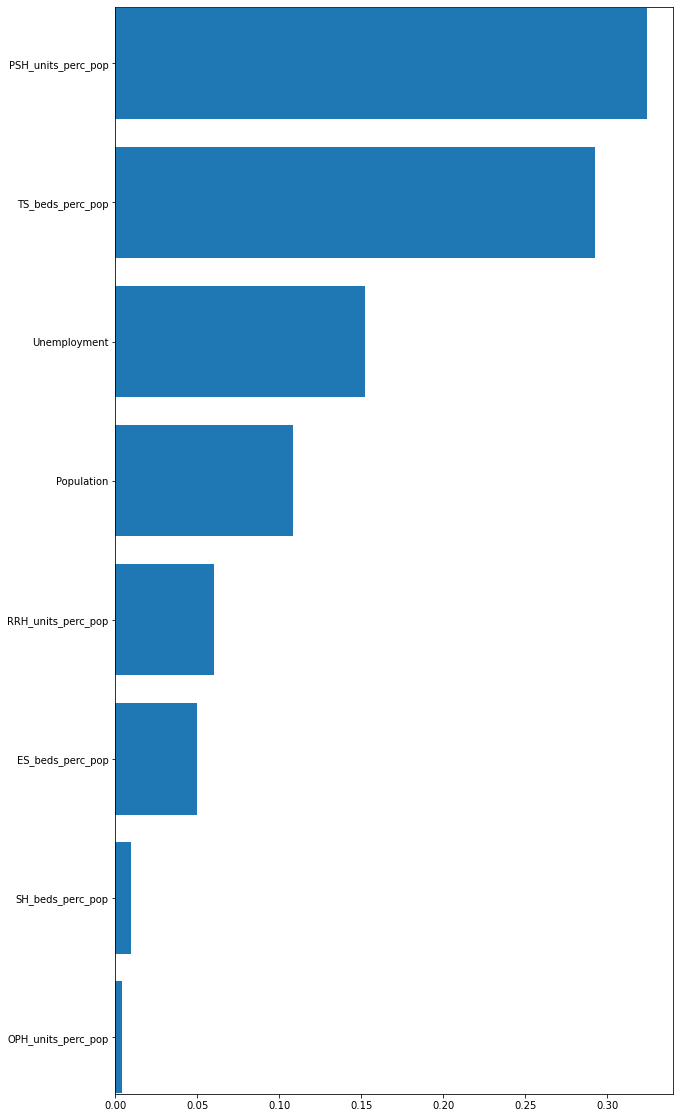

In [28]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [29]:
estimator = reg_model.estimators_[5]

[Text(0.5, 0.875, 'X[0] <= 286527.5\nsquared_error = 0.011\nsamples = 234\nvalue = 0.058'),
 Text(0.25, 0.625, 'X[5] <= 0.001\nsquared_error = 0.026\nsamples = 73\nvalue = 0.104'),
 Text(0.125, 0.375, 'X[6] <= 0.239\nsquared_error = 0.008\nsamples = 36\nvalue = 0.061'),
 Text(0.0625, 0.125, 'squared_error = 0.005\nsamples = 33\nvalue = 0.046'),
 Text(0.1875, 0.125, 'squared_error = 0.014\nsamples = 3\nvalue = 0.169'),
 Text(0.375, 0.375, 'X[5] <= 0.005\nsquared_error = 0.039\nsamples = 37\nvalue = 0.14'),
 Text(0.3125, 0.125, 'squared_error = 0.087\nsamples = 3\nvalue = 0.439'),
 Text(0.4375, 0.125, 'squared_error = 0.025\nsamples = 34\nvalue = 0.111'),
 Text(0.75, 0.625, 'X[3] <= 0.092\nsquared_error = 0.004\nsamples = 161\nvalue = 0.04'),
 Text(0.625, 0.375, 'X[1] <= 6.168\nsquared_error = 0.002\nsamples = 140\nvalue = 0.03'),
 Text(0.5625, 0.125, 'squared_error = 0.001\nsamples = 103\nvalue = 0.022'),
 Text(0.6875, 0.125, 'squared_error = 0.004\nsamples = 37\nvalue = 0.053'),
 Text(

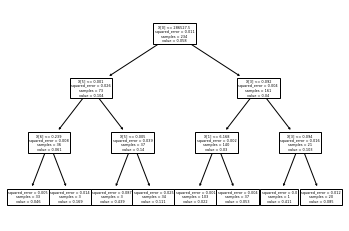

In [30]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [31]:
df_2015.to_csv('2015_converted.csv', index=False)